In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Helper functions 

The cell below holds helper funcitons that are used to read the data we collected in the lab. 

In [2]:
#readata from binary file into an array of type int16 
def read_binary_file_int16(file_path, num_chunks = -1):
    # Open the binary file for reading
    with open(file_path, 'rb') as f:
        #read the whole file or just the passed num_chunks
        if num_chunks == -1: 
            binary_data = f.read()  
        else: 
            binary_data = f.read(num_chunks * 2)     
        # Convert the binary data to a NumPy array of int16s
        np_array = np.frombuffer(binary_data, dtype=np.int16)    
    return np_array

#convert the int16 array into a single complex array
def convert_to_complex(int16_array):
    # Reshape the int16 array into a 2D array with shape (N/2, 2)
    reshaped_array = int16_array.reshape((-1, 2))
    # Convert the reshaped array to a complex dtype NumPy array
    complex_array = reshaped_array[:, 0] + 1j * reshaped_array[:, 1]
    return complex_array

#helper function for printing raw data
def print_int16_array_as_binary(int16_array, num_elements_to_print):
    # Loop through the specified number of elements in the array
    for i in range(num_elements_to_print):
        # Get the i-th element in the array and convert it to binary
        binary_str = format(int16_array[i], '016b')
        # Print the binary string on a new line
        print(binary_str)
def get_test_data(file_path, num_chunks=-1):
    int16_array = read_binary_file_int16(file_path, num_chunks)
    return convert_to_complex(int16_array)

# Read Data from 

In [3]:
file_path = "C://Users/josep/Downloads/usrp_samples_0dB.dat"

In [4]:
num_chuncks = int(1e7)
delay_samples = 324545
rx_sig_1 = get_test_data(file_path, num_chuncks)

mu, sigma = 0, 14 #played with sigma until the noise level roughlt matched the actual data
delay_noise = sigma*np.random.randn(delay_samples)

rx_sig_2 = np.hstack((delay_noise, rx_sig_1))

(4080000.0, 5000000.0)

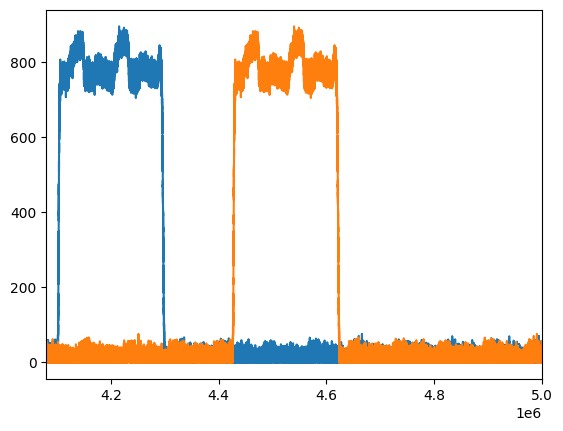

In [5]:
plt.plot(np.abs(rx_sig_1))
plt.plot(np.abs(rx_sig_2))
plt.xlim(4.08e6, 5e6)

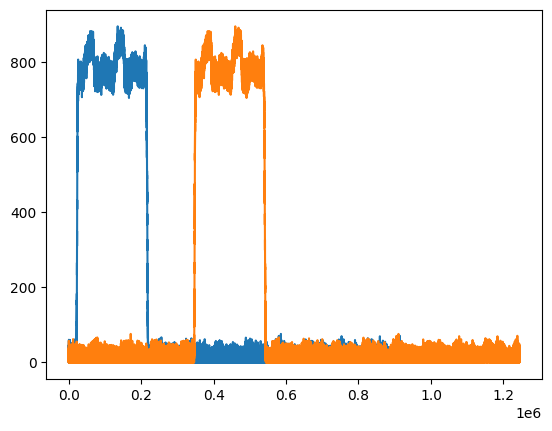

In [8]:
start = 4.08e6
s1 = np.abs(rx_sig_1[int(4.08e6):int(4.8e7)])
s2 = np.abs(rx_sig_2[int(4.08e6):int(4.8e7)])
plt.plot(s1)
plt.plot(s2)

In [12]:
xcorr = sp.signal.correlate(s1, s2)

# Host Processing

The host computers will do the following processing before sending data back to the host-controller for TDOA processing. My idea I want to test is that the host does the following simple processing:
1. Receive IQ data-stream
1. Take magnitude of data-stream to convert from I-Q to real
1. Pass data though a bandpass-filter
1. check if filter outpur is greater then some threshold value
1. If the threshold is exceeded take a timestamp and save 30 ms of data into a buffer
1. Run cross correlation of 30 ms sample and template expected rx signal
1. send packet to host controller with [rx_id, gpa_location, time of arrival]
1. possibly also send the 30 ms buffer data at then end of the packet

I simulate these steps in the `host_processing()` function below. Note I am also skipping the filtering for now, but should go back and add this later. 

In [24]:
def host_precessing(data_stream, threshold=200):
    signal = np.abs(data_stream)
    

In [25]:
def contol_processing():
    pass

324546
324545
324545


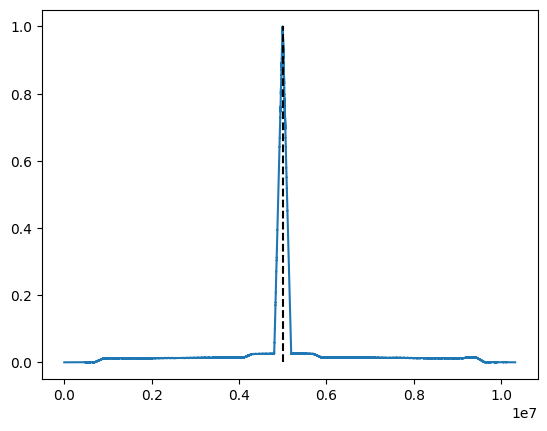

In [29]:
xcorr = sp.signal.correlate(np.abs(rx_sig_1), np.abs(rx_sig_2))
peak_idx = np.argmax(xcorr)
print(len(rx_sig_2)-peak_idx)
print(len(rx_sig_2)-len(rx_sig_1))
plt.plot(xcorr/np.max(xcorr))
plt.vlines(np.argmax(xcorr),0,1, 'k', '--')

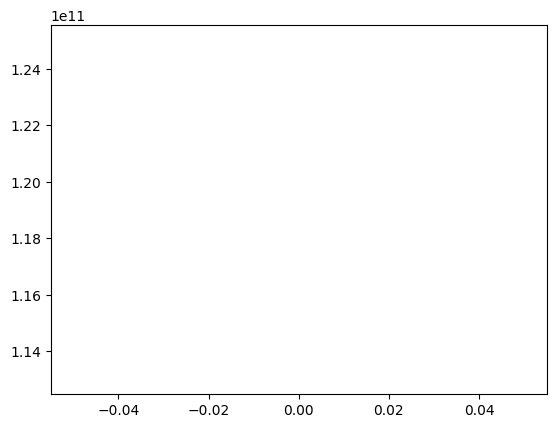

In [29]:
plt.plot(xcorr2)